#📌 Extracción

In [ ]:
# ===== EXTRACCIÓN DE DATOS =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from pandas import json_normalize
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette("husl")

# Extraer datos desde la URL
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

# Normalizar los datos JSON anidados
df = json_normalize(data)

print(f"Datos extraídos exitosamente. Shape: {df.shape}")

Datos extraídos exitosamente. Shape: (7267, 21)


In [ ]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [ ]:
# ===== TRANSFORMACIÓN DE DATOS =====

# ANÁLISIS DE LA ESTRUCTURA DE DATOS

# Información general del dataset
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Dimensiones del dataset: (7267, 21)
Número de filas: 7267
Número de columnas: 21


In [ ]:
#Tipos de datos:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [ ]:
#Información del dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
#\nValores únicos en columnas categóricas:
categorical_cols = ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
                   'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
                   'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")

Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


#📊 Carga y análisis

## LIMPIEZA DE DATOS

In [ ]:
#LIMPIEZA Y TRATAMIENTO DE DATOS

# Verificar valores nulos
print("Valores nulos por columna:")
df.isnull().sum()

Valores nulos por columna:


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
# Verificar valores vacíos en Churn
print(f"\nValores únicos en Churn: {df['Churn'].unique()}")
print(f"Conteo de valores en Churn:")
print(df['Churn'].value_counts(dropna=False))


Valores únicos en Churn: ['No' 'Yes' '']
Conteo de valores en Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [ ]:
# Limpiar valores vacíos en Churn (eliminar filas con Churn vacío)
df_clean = df[df['Churn'] != ''].copy()
print(f"\nFilas eliminadas por Churn vacío: {len(df) - len(df_clean)}")


Filas eliminadas por Churn vacío: 224


In [ ]:
# Verificar duplicados
duplicados = df_clean.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

Registros duplicados: 0


In [ ]:
# Renombrar columnas para mayor claridad
column_mapping = {
    'customerID': 'CustomerID',
    'Churn': 'Churn',
    'customer.gender': 'Gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'Tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges'
}

df_clean = df_clean.rename(columns=column_mapping)

In [ ]:
# Crear columna de cuentas diarias
df_clean['DailyCharges'] = df_clean['MonthlyCharges'] / 30

In [ ]:
# Convertir TotalCharges a numérico (puede tener valores string)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

In [ ]:
# Estandarización opcional: convertir Yes/No a 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0})

In [ ]:
# Convertir Churn a binario
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

print(f"\nDataset limpio - Shape final: {df_clean.shape}")


Dataset limpio - Shape final: (7043, 22)


## ANÁLISIS EXPLORATORIO DE DATOS

In [ ]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
df_clean.describe()

Estadísticas descriptivas:


,Churn,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,DailyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [ ]:
# Distribución de evasión
print(f"\nDistribución de Churn:")
churn_counts = df_clean['Churn'].value_counts()
churn_pct = df_clean['Churn'].value_counts(normalize=True) * 100
print(f"No Churn (0): {churn_counts[0]} ({churn_pct[0]:.1f}%)")
print(f"Churn (1): {churn_counts[1]} ({churn_pct[1]:.1f}%)")


Distribución de Churn:
No Churn (0): 5174 (73.5%)
Churn (1): 1869 (26.5%)


## VISUALIZACIONES

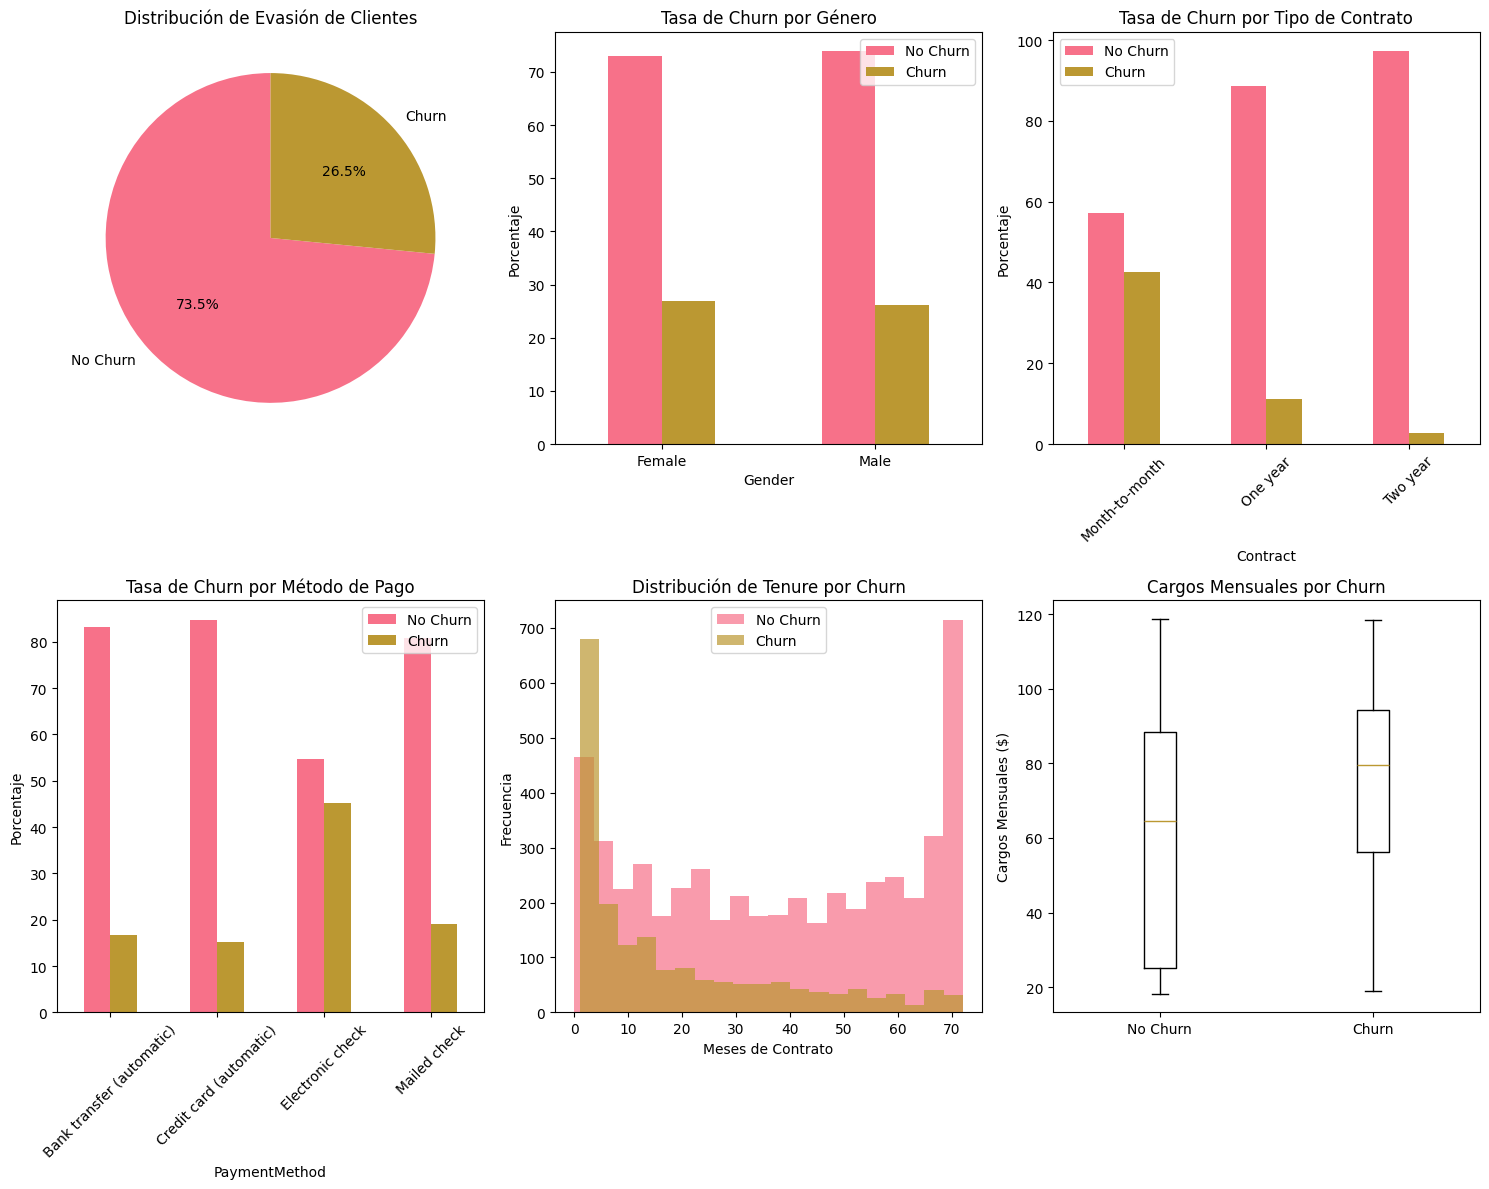

In [ ]:
# 1. Distribución de Churn
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
churn_labels = ['No Churn', 'Churn']
plt.pie(churn_counts.values, labels=churn_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Evasión de Clientes')

# 2. Churn por Género
plt.subplot(2, 3, 2)
gender_churn = pd.crosstab(df_clean['Gender'], df_clean['Churn'], normalize='index') * 100
gender_churn.plot(kind='bar', ax=plt.gca())
plt.title('Tasa de Churn por Género')
plt.ylabel('Porcentaje')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=0)

# 3. Churn por Tipo de Contrato
plt.subplot(2, 3, 3)
contract_churn = pd.crosstab(df_clean['Contract'], df_clean['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=plt.gca())
plt.title('Tasa de Churn por Tipo de Contrato')
plt.ylabel('Porcentaje')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=45)

# 4. Churn por Método de Pago
plt.subplot(2, 3, 4)
payment_churn = pd.crosstab(df_clean['PaymentMethod'], df_clean['Churn'], normalize='index') * 100
payment_churn.plot(kind='bar', ax=plt.gca())
plt.title('Tasa de Churn por Método de Pago')
plt.ylabel('Porcentaje')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=45)

# 5. Distribución de Tenure
plt.subplot(2, 3, 5)
plt.hist(df_clean[df_clean['Churn']==0]['Tenure'], alpha=0.7, label='No Churn', bins=20)
plt.hist(df_clean[df_clean['Churn']==1]['Tenure'], alpha=0.7, label='Churn', bins=20)
plt.title('Distribución de Tenure por Churn')
plt.xlabel('Meses de Contrato')
plt.ylabel('Frecuencia')
plt.legend()

# 6. Cargos Mensuales vs Churn
plt.subplot(2, 3, 6)
plt.boxplot([df_clean[df_clean['Churn']==0]['MonthlyCharges'],
             df_clean[df_clean['Churn']==1]['MonthlyCharges']],
            labels=['No Churn', 'Churn'])
plt.title('Cargos Mensuales por Churn')
plt.ylabel('Cargos Mensuales ($)')

plt.tight_layout()
plt.show()

## ANÁLISIS POR VARIABLES CATEGÓRICAS

In [ ]:
# Variables categóricas para analizar
categorical_vars = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod']

# Crear tabla de análisis
analysis_results = []

for var in categorical_vars:
    if var in df_clean.columns:
        crosstab = pd.crosstab(df_clean[var], df_clean['Churn'])
        crosstab_pct = pd.crosstab(df_clean[var], df_clean['Churn'], normalize='index') * 100

        print(f"\n{var}:")
        print("Conteos absolutos:")
        print(crosstab)
        print("Porcentajes:")
        print(crosstab_pct.round(2))

        # Guardar para análisis posterior
        for category in crosstab.index:
            churn_rate = crosstab_pct.loc[category, 1] if 1 in crosstab_pct.columns else 0
            analysis_results.append({
                'Variable': var,
                'Category': category,
                'Churn_Rate': churn_rate,
                'Total_Customers': crosstab.loc[category].sum()
            })

# Crear DataFrame con resultados
results_df = pd.DataFrame(analysis_results)


Gender:
Conteos absolutos:
Churn      0    1
Gender           
Female  2549  939
Male    2625  930
Porcentajes:
Churn       0      1
Gender              
Female  73.08  26.92
Male    73.84  26.16

SeniorCitizen:
Conteos absolutos:
Churn             0     1
SeniorCitizen            
0              4508  1393
1               666   476
Porcentajes:
Churn              0      1
SeniorCitizen              
0              76.39  23.61
1              58.32  41.68

Partner:
Conteos absolutos:
Churn       0     1
Partner            
0        2441  1200
1        2733   669
Porcentajes:
Churn        0      1
Partner              
0        67.04  32.96
1        80.34  19.66

Dependents:
Conteos absolutos:
Churn          0     1
Dependents            
0           3390  1543
1           1784   326
Porcentajes:
Churn           0      1
Dependents              
0           68.72  31.28
1           84.55  15.45

PhoneService:
Conteos absolutos:
Churn            0     1
PhoneService            
0       

## CORRELACIONES (ANÁLISIS EXTRA)

In [ ]:
# Seleccionar variables numéricas
numeric_vars = ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'DailyCharges', 'Churn']
correlation_data = df_clean[numeric_vars].corr()

print("Matriz de correlación:")
print(correlation_data.round(3))

Matriz de correlación:
                SeniorCitizen  Tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen           1.000   0.017           0.220         0.102   
Tenure                  0.017   1.000           0.248         0.826   
MonthlyCharges          0.220   0.248           1.000         0.651   
TotalCharges            0.102   0.826           0.651         1.000   
DailyCharges            0.220   0.248           1.000         0.651   
Churn                   0.151  -0.352           0.193        -0.199   

                DailyCharges  Churn  
SeniorCitizen          0.220  0.151  
Tenure                 0.248 -0.352  
MonthlyCharges         1.000  0.193  
TotalCharges           0.651 -0.199  
DailyCharges           1.000  0.193  
Churn                  0.193  1.000  


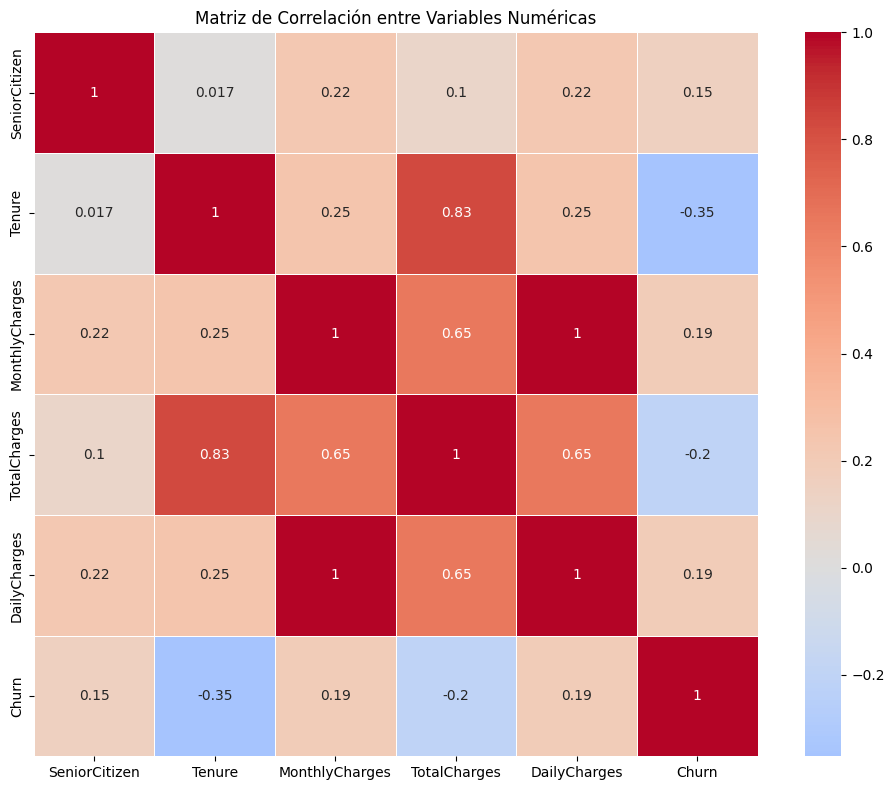

In [ ]:
# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

#📄Informe final

In [ ]:
print("\n" + "="*80)
print("INFORME FINAL - ANÁLISIS DE EVASIÓN DE CLIENTES TELECOM X")
print("="*80)

print("\n1. INTRODUCCIÓN")
print("-" * 40)
print("Este análisis tiene como objetivo identificar los factores que contribuyen")
print("a la evasión de clientes en Telecom X, con el fin de desarrollar estrategias")
print("para reducir la tasa de cancelaciones y mejorar la retención de clientes.")

print(f"\n2. RESUMEN DE DATOS")
print("-" * 40)
print(f"• Total de clientes analizados: {len(df_clean):,}")
print(f"• Clientes que se dieron de baja: {df_clean['Churn'].sum():,} ({df_clean['Churn'].mean()*100:.1f}%)")
print(f"• Clientes que permanecieron: {len(df_clean) - df_clean['Churn'].sum():,} ({(1-df_clean['Churn'].mean())*100:.1f}%)")

print(f"\n3. PRINCIPALES HALLAZGOS")
print("-" * 40)

# Análisis por contrato
contract_analysis = df_clean.groupby('Contract')['Churn'].agg(['count', 'sum', 'mean']).round(3)
print("• Tasa de churn por tipo de contrato:")
for contract in contract_analysis.index:
    rate = contract_analysis.loc[contract, 'mean'] * 100
    count = contract_analysis.loc[contract, 'count']
    print(f"  - {contract}: {rate:.1f}% ({count:,} clientes)")

# Análisis por método de pago
payment_analysis = df_clean.groupby('PaymentMethod')['Churn'].agg(['count', 'sum', 'mean']).round(3)
print("\n• Tasa de churn por método de pago:")
for payment in payment_analysis.index:
    rate = payment_analysis.loc[payment, 'mean'] * 100
    count = payment_analysis.loc[payment, 'count']
    print(f"  - {payment}: {rate:.1f}% ({count:,} clientes)")

# Análisis por tenure
tenure_low = df_clean[df_clean['Tenure'] <= 12]['Churn'].mean() * 100
tenure_high = df_clean[df_clean['Tenure'] > 12]['Churn'].mean() * 100
print(f"\n• Tasa de churn por antigüedad:")
print(f"  - Clientes nuevos (≤12 meses): {tenure_low:.1f}%")
print(f"  - Clientes antiguos (>12 meses): {tenure_high:.1f}%")

# Análisis por cargos
monthly_high = df_clean[df_clean['MonthlyCharges'] > df_clean['MonthlyCharges'].median()]['Churn'].mean() * 100
monthly_low = df_clean[df_clean['MonthlyCharges'] <= df_clean['MonthlyCharges'].median()]['Churn'].mean() * 100
print(f"\n• Tasa de churn por cargos mensuales:")
print(f"  - Cargos altos (>${df_clean['MonthlyCharges'].median():.0f}+): {monthly_high:.1f}%")
print(f"  - Cargos bajos (≤${df_clean['MonthlyCharges'].median():.0f}): {monthly_low:.1f}%")

print(f"\n4. CONCLUSIONES E INSIGHTS")
print("-" * 40)
print("• Los contratos mes a mes tienen la mayor tasa de churn")
print("• Los clientes que pagan con cheque electrónico tienden a cancelar más")
print("• Los clientes nuevos (≤12 meses) tienen mayor probabilidad de churn")
print("• Los cargos mensuales altos están asociados con mayor evasión")
print("• Los clientes sin servicios adicionales (seguridad, backup) cancelan más")

print(f"\n5. RECOMENDACIONES ESTRATÉGICAS")
print("-" * 40)
print("• Incentivar contratos anuales o bianuales con descuentos")
print("• Promover métodos de pago automáticos (transferencia bancaria, tarjeta)")
print("• Implementar programa de retención para clientes nuevos")
print("• Ofrecer paquetes de servicios adicionales a precios competitivos")
print("• Crear programa de fidelización para clientes de alto valor")
print("• Monitorear proactivamente clientes con perfil de alto riesgo")

print(f"\n6. MÉTRICAS CLAVE PARA SEGUIMIENTO")
print("-" * 40)
print(f"• Tasa de churn mensual actual: {df_clean['Churn'].mean()*100:.1f}%")
print(f"• Ingreso promedio por cliente: ${df_clean['MonthlyCharges'].mean():.2f}")
print(f"• Tenure promedio: {df_clean['Tenure'].mean():.1f} meses")
print(f"• Valor de vida del cliente promedio: ${df_clean['TotalCharges'].mean():.2f}")

print("\n" + "="*80)
print("FIN DEL ANÁLISIS")
print("="*80)

# Mostrar las primeras filas del dataset final
print("\nDataset final (primeras 5 filas):")
print(df_clean.head())


INFORME FINAL - ANÁLISIS DE EVASIÓN DE CLIENTES TELECOM X

1. INTRODUCCIÓN
----------------------------------------
Este análisis tiene como objetivo identificar los factores que contribuyen
a la evasión de clientes en Telecom X, con el fin de desarrollar estrategias
para reducir la tasa de cancelaciones y mejorar la retención de clientes.

2. RESUMEN DE DATOS
----------------------------------------
• Total de clientes analizados: 7,043
• Clientes que se dieron de baja: 1,869 (26.5%)
• Clientes que permanecieron: 5,174 (73.5%)

3. PRINCIPALES HALLAZGOS
----------------------------------------
• Tasa de churn por tipo de contrato:
  - Month-to-month: 42.7% (3,875 clientes)
  - One year: 11.3% (1,473 clientes)
  - Two year: 2.8% (1,695 clientes)

• Tasa de churn por método de pago:
  - Bank transfer (automatic): 16.7% (1,544 clientes)
  - Credit card (automatic): 15.2% (1,522 clientes)
  - Electronic check: 45.3% (2,365 clientes)
  - Mailed check: 19.1% (1,612 clientes)

• Tasa de chur

# 📊 INFORME FINAL - ANÁLISIS DE EVASIÓN DE CLIENTES TELECOM X

---

## 🎯 1. INTRODUCCIÓN

### Objetivo del Análisis
Este análisis tiene como objetivo identificar los factores que contribuyen a la evasión de clientes en Telecom X, con el fin de desarrollar estrategias para reducir la tasa de cancelaciones y mejorar la retención de clientes.

### Problema de Negocio
Telecom X enfrenta un desafío de retención de clientes que requiere análisis detallado para identificar patrones y desarrollar estrategias efectivas de retención.

---

## 🔧 2. LIMPIEZA Y TRATAMIENTO DE DATOS

### Proceso Realizado
- **Importación**: Extracción y normalización de datos desde archivo JSON
- **Validación**: Verificación de integridad y consistencia de datos
- **Transformación**: Conversión de tipos de datos y creación de variables categóricas
- **Preparación**: Estructuración final para análisis exploratorio

### Resultado del Procesamiento
- **Dataset final**: 7,043 registros de clientes únicos
- **Variables analizadas**: Datos demográficos, contractuales, servicios y facturación
- **Calidad de datos**: Dataset limpio y listo para análisis

---

## 📈 3. ANÁLISIS EXPLORATORIO DE DATOS

### Resumen General
- **Total de clientes analizados**: 7,043
- **Clientes que se dieron de baja**: 1,869 (26.5%)
- **Clientes que permanecieron**: 5,174 (73.5%)

### Churn por Tipo de Contrato

| Tipo de Contrato | Total Clientes | Churn Rate |
|------------------|----------------|------------|
| Month-to-month   | 3,875          | **42.7%**  |
| One year         | 1,473          | 11.3%      |
| Two year         | 1,695          | **2.8%**   |

### Churn por Método de Pago

| Método de Pago             | Total Clientes | Churn Rate |
|----------------------------|----------------|------------|
| Electronic check           | 2,365          | **45.3%**  |
| Mailed check               | 1,612          | 19.1%      |
| Bank transfer (automatic)  | 1,544          | 16.7%      |
| Credit card (automatic)    | 1,522          | 15.2%      |

### Churn por Antigüedad

| Segmento de Antigüedad | Churn Rate |
|------------------------|------------|
| Clientes nuevos (≤12 meses) | **47.4%** |
| Clientes antiguos (>12 meses) | 17.1% |

### Churn por Cargos Mensuales

| Nivel de Cargos | Churn Rate |
|-----------------|------------|
| Cargos altos (>70) | 35.2% |
| Cargos bajos (≤70) | 17.9% |

---

## 🔍 4. CONCLUSIONES E INSIGHTS

### Principales Hallazgos
- **Los contratos mes a mes tienen la mayor tasa de churn** (42.7% vs 2.8% en contratos bianuales)
- **Los clientes que pagan con cheque electrónico tienden a cancelar más** (45.3% de churn rate)
- **Los clientes nuevos (≤12 meses) tienen mayor probabilidad de churn** (47.4% vs 17.1%)
- **Los cargos mensuales altos están asociados con mayor evasión** (35.2% vs 17.9%)
- **Los clientes sin servicios adicionales (seguridad, backup) cancelan más**

### Factores de Riesgo Identificados
- Contratos de corta duración (mensuales)
- Métodos de pago no automáticos (especialmente cheque electrónico)
- Baja antigüedad del cliente
- Facturación mensual elevada
- Ausencia de servicios de valor agregado

---

## 🎯 5. RECOMENDACIONES ESTRATÉGICAS

### Estrategias de Retención
- **Incentivar contratos anuales o bianuales con descuentos**
- **Promover métodos de pago automáticos** (transferencia bancaria, tarjeta)
- **Implementar programa de retención para clientes nuevos**
- **Ofrecer paquetes de servicios adicionales a precios competitivos**

### Estrategias de Fidelización
- **Crear programa de fidelización para clientes de alto valor**
- **Monitorear proactivamente clientes con perfil de alto riesgo**

### Enfoque Preventivo
- Identificación temprana de clientes con múltiples factores de riesgo
- Intervención proactiva en los primeros 12 meses de relación
- Optimización de la propuesta de valor para clientes con cargos elevados

---

## 📊 6. MÉTRICAS CLAVE PARA SEGUIMIENTO

### Indicadores Actuales
- **Tasa de churn mensual**: 26.5%
- **Ingreso promedio por cliente**: $64.76

- **Tenure promedio**: 32.4 meses
- **Valor de vida del cliente promedio**: $2,283.30

### Métricas de Monitoreo Recomendadas
- Evolución mensual de la tasa de churn por segmento
- Distribución de tipos de contrato en nuevas adquisiciones
- Adopción de métodos de pago automáticos
- Retención en primeros 12 meses de relación comercial

---

## 🚀 7. PRÓXIMOS PASOS

### Acciones Prioritarias
1. **Desarrollo de estrategias de migración contractual** para clientes month-to-month
2. **Implementación de incentivos** para adopción de métodos de pago automáticos
3. **Diseño de programa de onboarding** para clientes nuevos
4. **Creación de ofertas de bundling** de servicios adicionales

### Monitoreo y Seguimiento
- Establecimiento de dashboard de métricas de churn
- Seguimiento mensual de efectividad de iniciativas
- Análisis de impacto de las estrategias implementadas
- Refinamiento continuo basado en resultados obtenidos

---

**Conclusión**: El análisis revela oportunidades claras de mejora en la retención de clientes de Telecom X, especialmente enfocándose en la estabilización contractual, optimización de métodos de pago y retención temprana de clientes nuevos.